<a href="https://colab.research.google.com/github/Divyanshu-sharma-coder/Power_Transformer/blob/main/Power_TransFormer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview Of today's Project
* So in this project we solve a regression problem , we had a Dataset and we need to predict strength of cement
* so this is a raw data and our main focus is not prediction even though it is basically Power Transformation.
* In today's project we use two Power Transformers
 1. Box-Cox Transformer
 2. Yo-Jhonsan Transformer

# Importing Necessary Libraries and Dataset

In [ ]:
from google.colab import files
files.upload()

Saving concrete_data.csv to concrete_data (2).csv


{'concrete_data (2).csv': b'Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength\r\n540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1040.0 ,676.0 ,28 ,79.99 \r\n540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1055.0 ,676.0 ,28 ,61.89 \r\n332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,270 ,40.27 \r\n332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,41.05 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,360 ,44.30 \r\n266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,90 ,47.03 \r\n380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,43.70 \r\n380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,36.45 \r\n266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,28 ,45.85 \r\n475.0 ,0.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,39.29 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,90 ,38.07 \r\n198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,28 ,28.02 \r\n427.5 ,47.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,270 ,43.01 \r\n190.0 ,190.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,90 ,42.33 \r\n304.0 ,76.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from scipy import stats

# Data Info

In [ ]:
df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


* In this Column we can see that some columns like Blast Furnace Slag , Fly Ash, Superplasticizer had values like 0.
* And it is clear that Yo-Jhonsan is perform better than BOX-COX but we apply both so you can learn new trick that how we apply BOX-COX for dataset that had 0.
And Yo-Jhonsan.
* But First We Check that there is no missing values

In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


# Agenda
 * First we train model without any Transformation
 * Than With BOX-COX
 * Than with Yo-Jhonsan
 * AND CHECK Accuracy Score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:8], df.iloc[:, -1], test_size=0.2, random_state = 42)

In [ ]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [ ]:
y_train.head()

,Strength
995,27.68
507,62.05
334,23.80
848,33.40
294,7.40


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.627553179231485

* This is a regression problem and all columns are numeric so that's why we use r2_score instead of accuracy_score

# Cross Validation Score

In [ ]:
np.mean(cross_val_score(lr, df.iloc[:,0:8],df.iloc[:,-1], scoring ='r2'))
print(r2_score)

<function r2_score at 0x78e3da3331a0>


# Plotting Graph that how much are values far from Normal Distribution

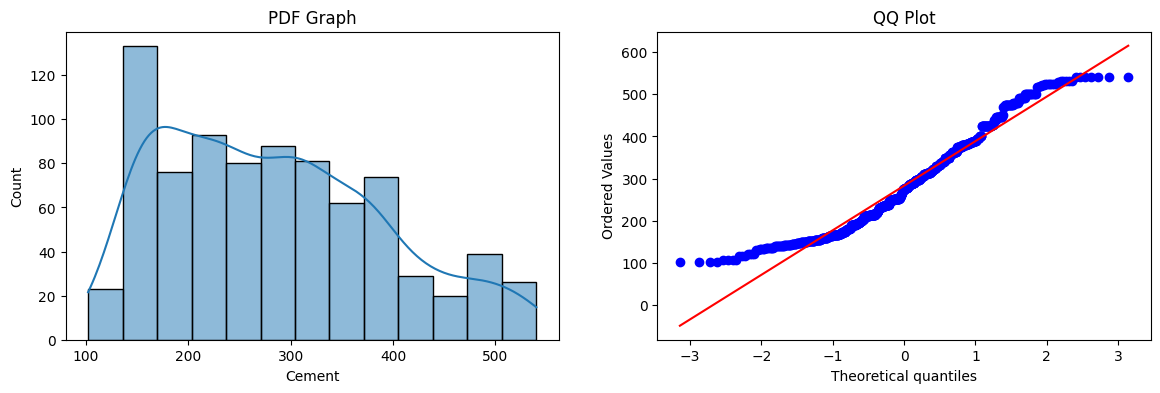

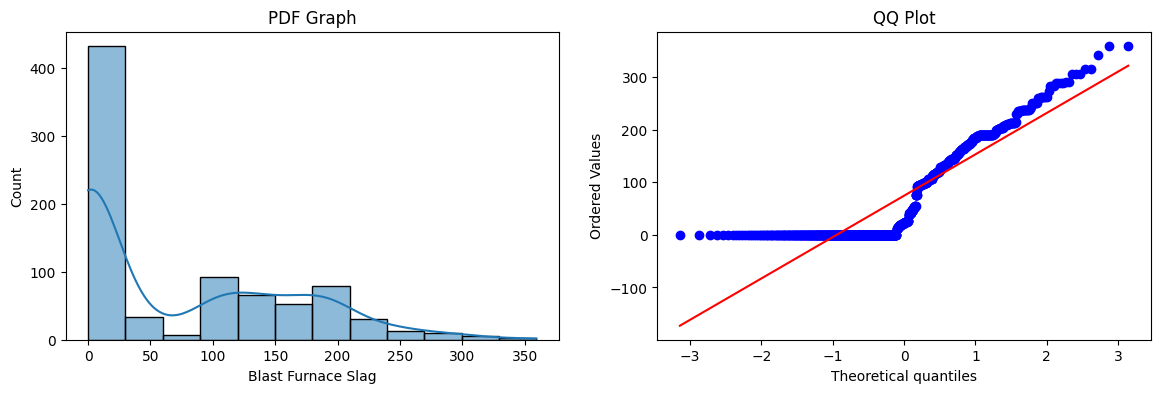

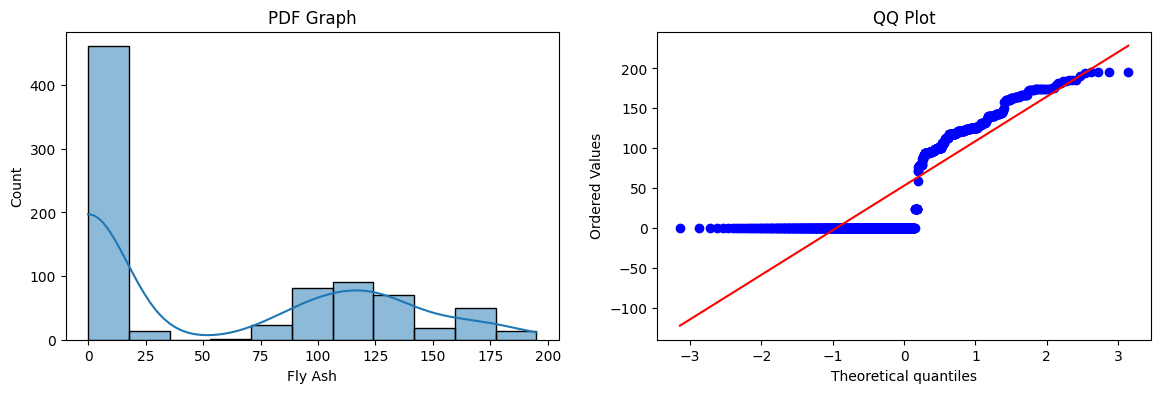

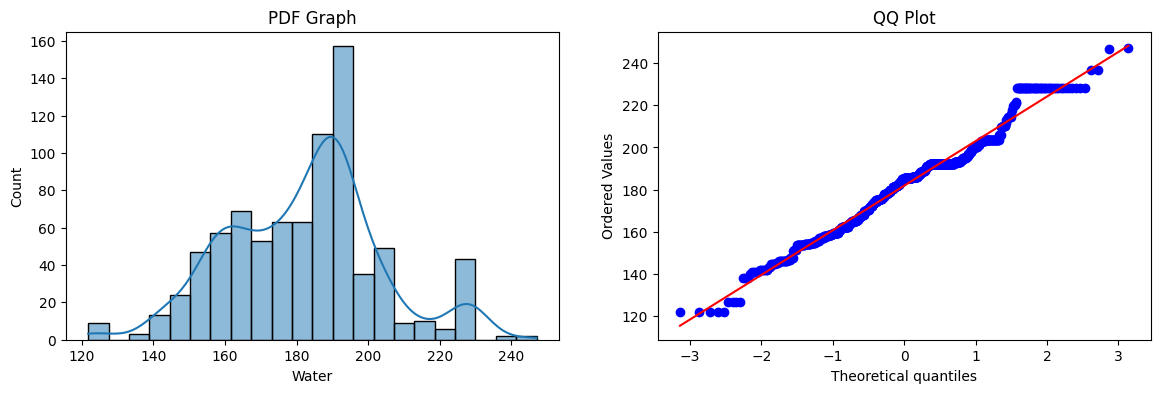

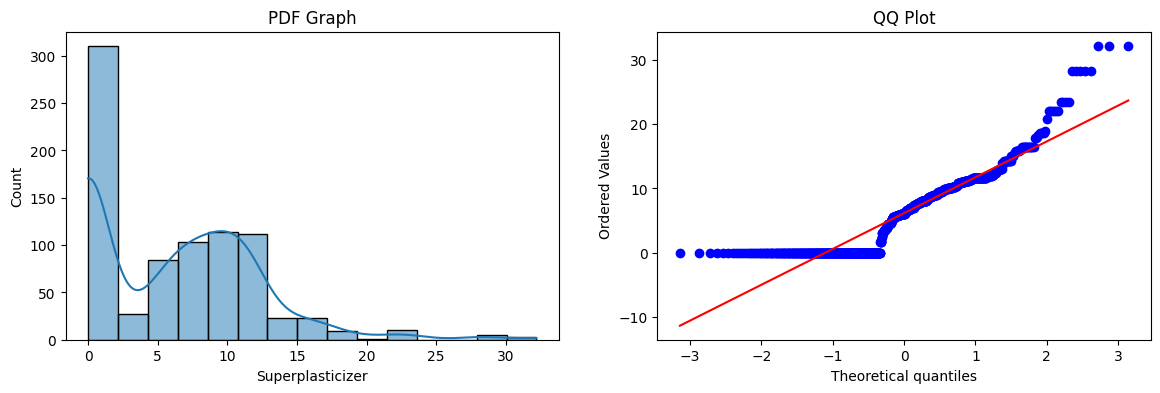

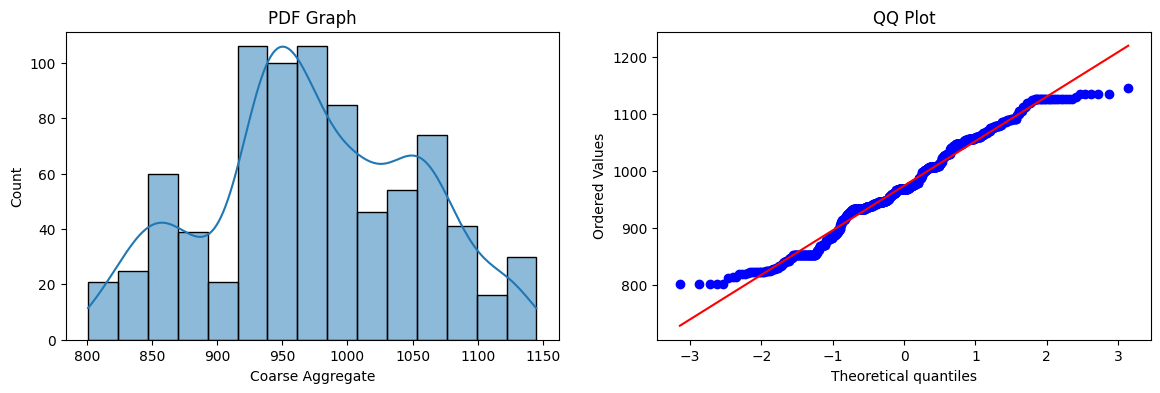

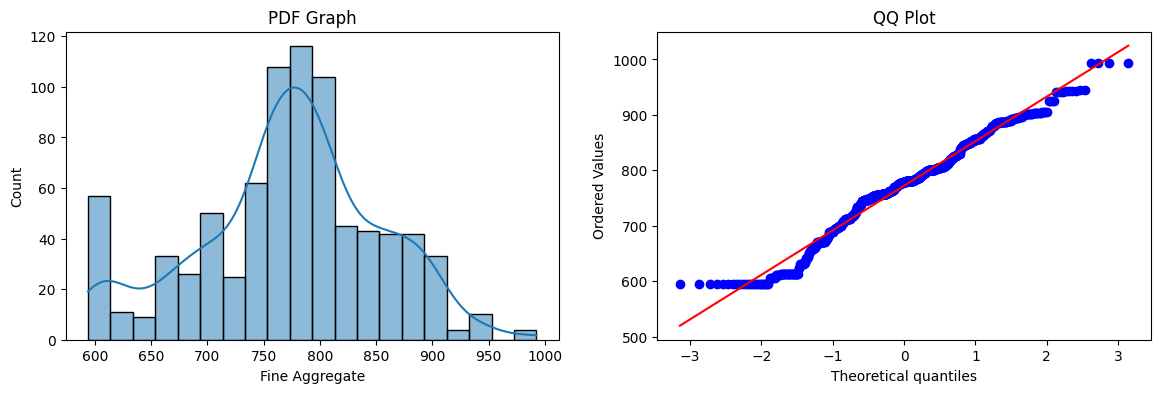

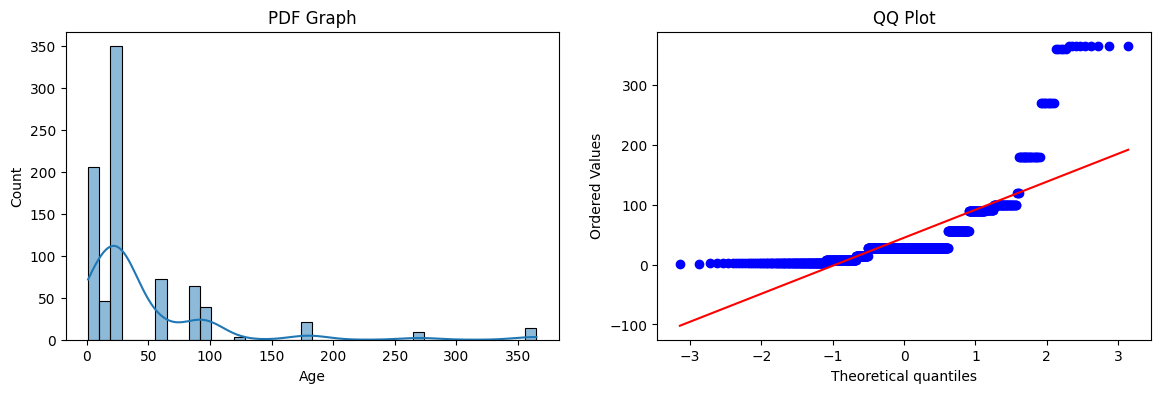

In [ ]:
for col in X_train.columns:
 plt.figure(figsize=(14,4))
 plt.subplot(121)
 sns.histplot(X_train[col], kde=True)
 plt.title("PDF Graph", color = "black")

 plt.subplot(122)
 stats.probplot(X_train[col], dist="norm", plot=plt)
 plt.title("QQ Plot", color="black")

 plt.show()

# Age , Superplasticizer, Fly Ash , Blast Furnace Slag
* Power Transformer

In [ ]:
pt = PowerTransformer(method="box-cox")

In [ ]:
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


* Here we can see the lambda values what should the model get

In [ ]:
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_pred2 = lr.predict(X_test_transformed)

In [ ]:
r2_score(y_test, y_pred2)

0.8047824993083206

In [ ]:
pt = PowerTransformer(method = 'box-cox')
X_transformed = pt.fit_transform(df.iloc[:,0:8]+0.000001)

In [ ]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,df.iloc[:, -1],scoring='r2'))

np.float64(0.6662950329054064)

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [ ]:
X_train_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.106010
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.106010
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.675970
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.106010
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.997079,-0.887212,-1.769923,0.820684,0.390563,0.358776,-1.675970
820,-0.198733,-1.085667,1.133622,-1.839129,0.838861,1.445973,0.322797,-0.475625
821,-0.844517,-1.085667,1.133681,-0.706089,0.788486,1.345367,0.297157,1.246733
822,1.565624,0.925496,-0.887212,-0.019311,0.761011,-1.537255,0.076211,0.106010


* So here we can see all lambda values.

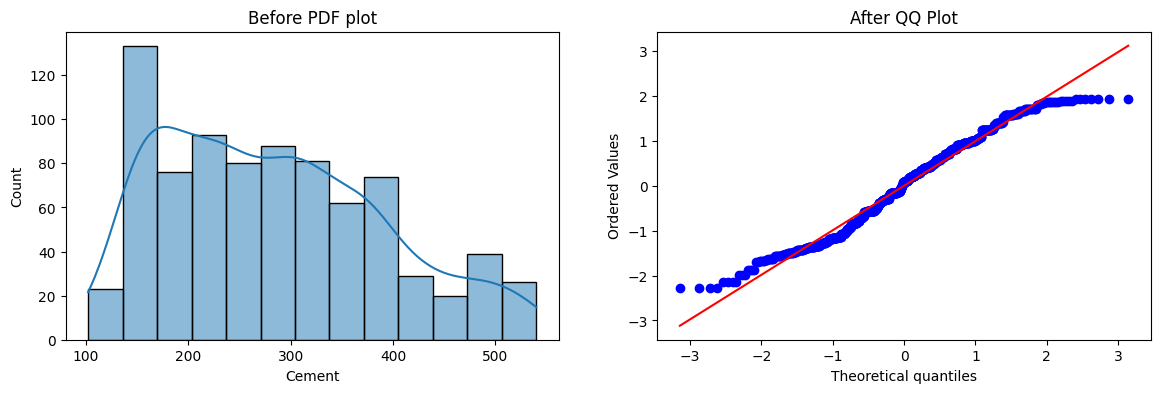

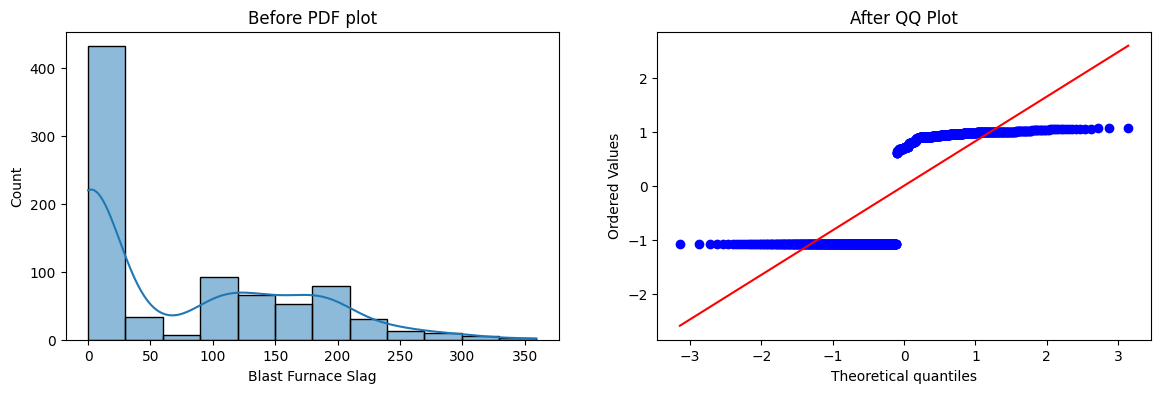

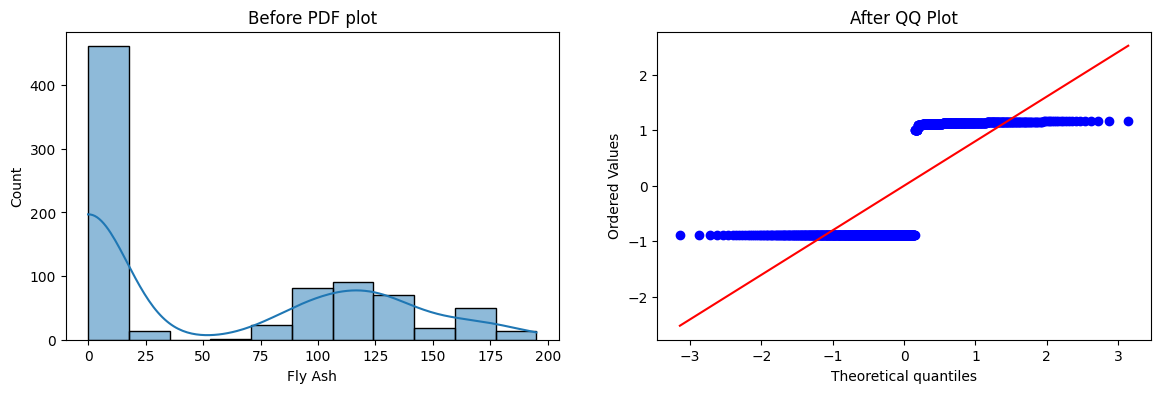

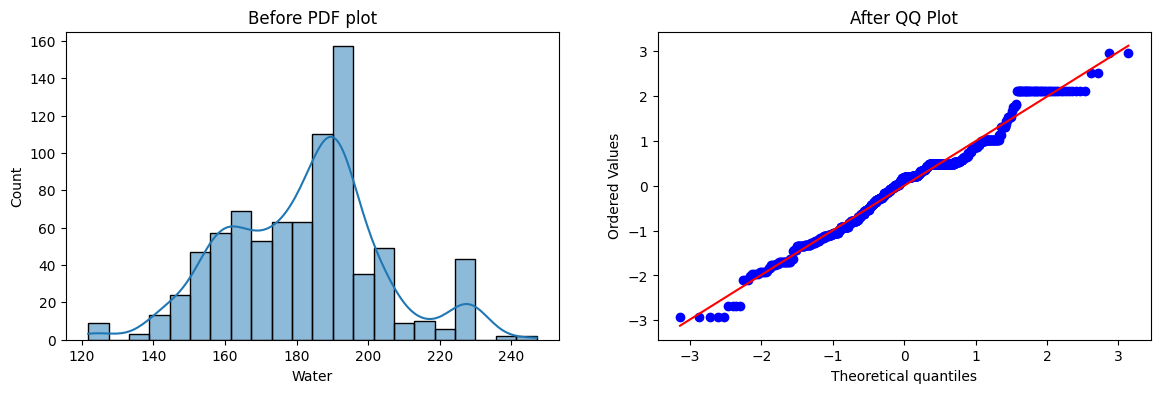

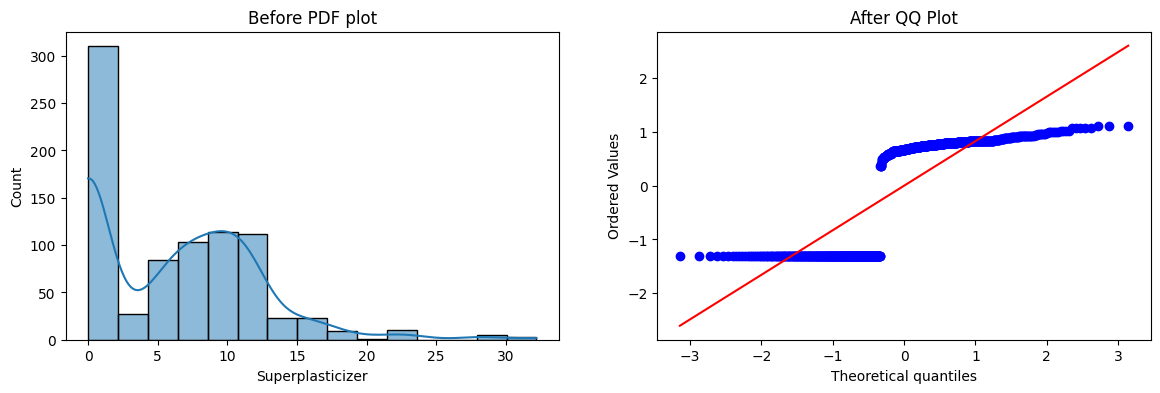

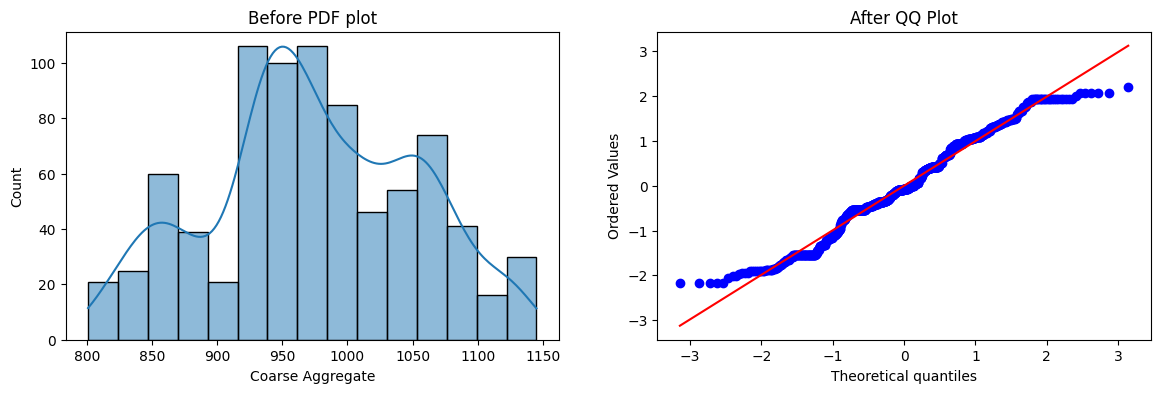

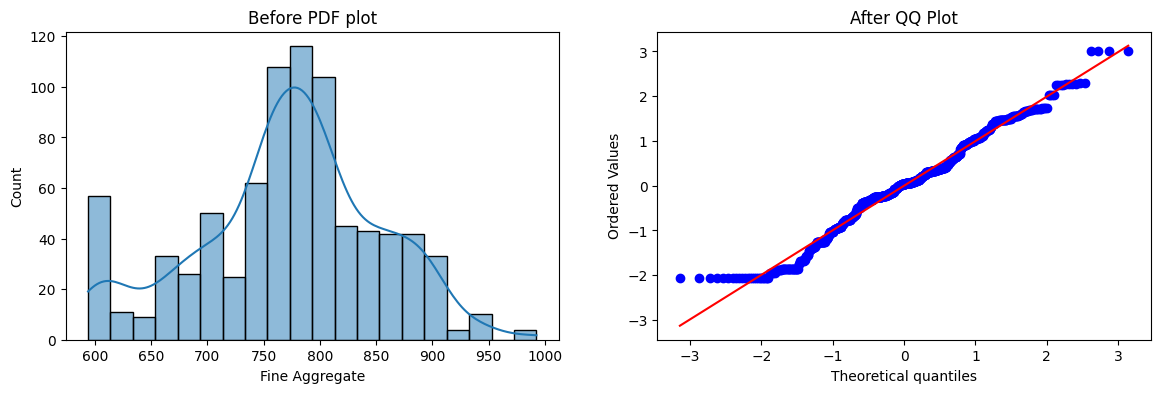

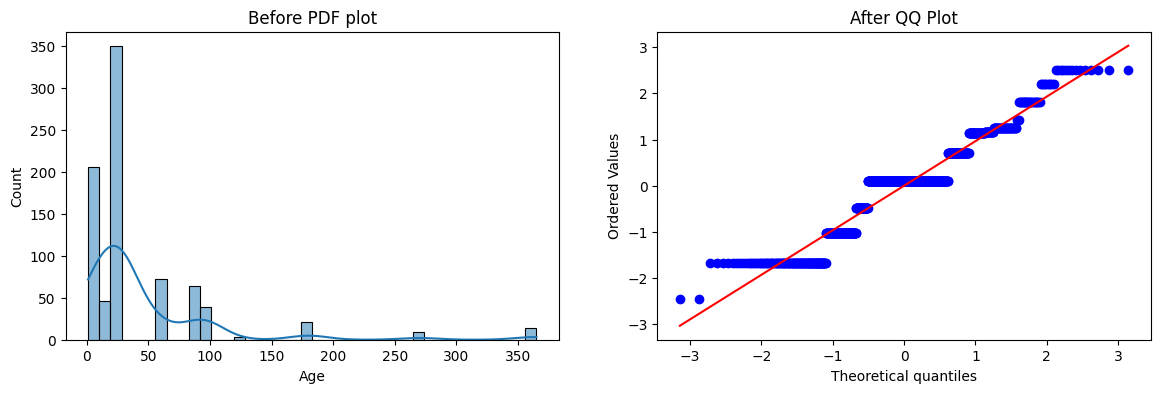

In [ ]:
for col in X_train.columns:
 plt.figure(figsize=(14,4))
 plt.subplot(121)
 sns.histplot(X_train[col], kde=True)
 plt.title("Before PDF plot", color = "black")

 plt.subplot(122)
 stats.probplot(X_train_transformed[col], dist="norm", plot=plt)
 plt.title("After QQ Plot", color="black")

 plt.show()

In [ ]:
pt1 = PowerTransformer()

In [ ]:
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

In [ ]:
lr.fit(X_train_transformed2, y_train)

LinearRegression()

In [ ]:
y_pred3 = lr.predict(X_test_transformed2)

In [ ]:
r2_score(y_test, y_pred3)

0.8161906512004999

In [ ]:
pd.DataFrame({'cols':X_train.columns,'Yeo_johnson_lambdas':pt1.lambdas_})

,cols,Yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
pt = PowerTransformer()

In [ ]:
X_train_transformed2 = pt.fit_transform(df.iloc[:, 0:8])

In [ ]:
np.mean(cross_val_score(lr,X_train_transformed2,df.iloc[:,-1],scoring='r2'))

np.float64(0.6834625141500866)

In [ ]:
X_train_transformed3 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

In [ ]:
X_train_transformed3

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692
4,-0.744998,0.969970,-0.902763,0.496978,-1.225815,0.065405,0.629012,2.389241
...,...,...,...,...,...,...,...,...
1025,0.108575,0.913437,1.032900,-0.080927,0.679902,-1.319486,-0.109853,0.111732
1026,0.521344,-1.057530,1.107519,0.681864,0.839200,-1.979236,0.469048,0.111732
1027,-1.456225,0.992044,1.088866,0.529385,0.327196,-1.036057,0.037694,0.111732
1028,-1.290790,1.117718,-0.902763,-0.268951,0.927490,0.209799,0.151168,0.111732


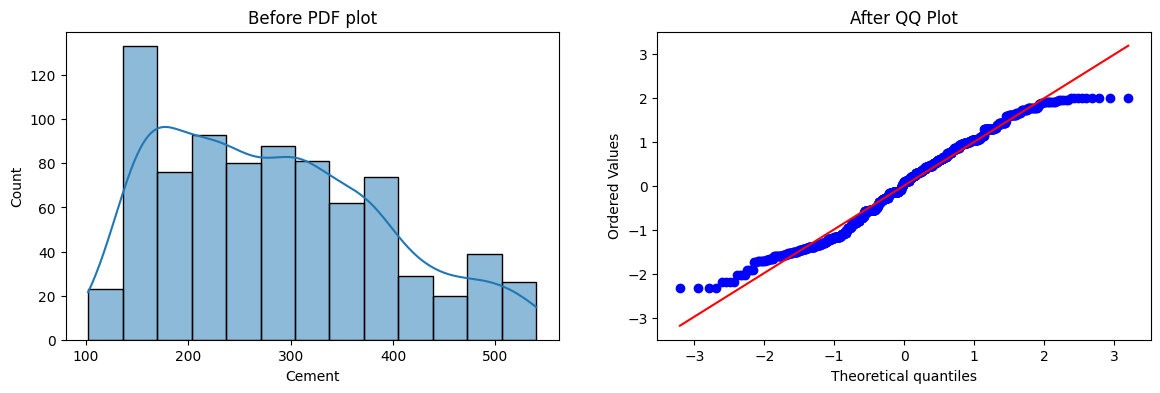

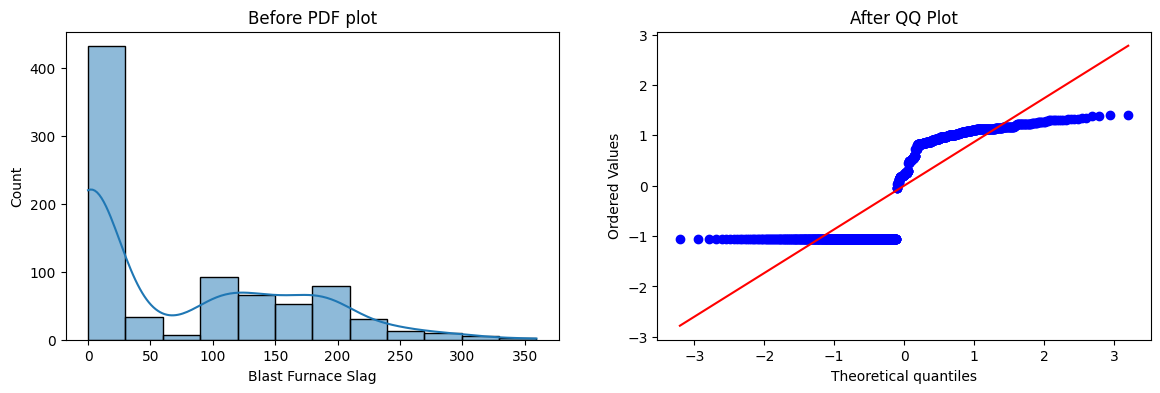

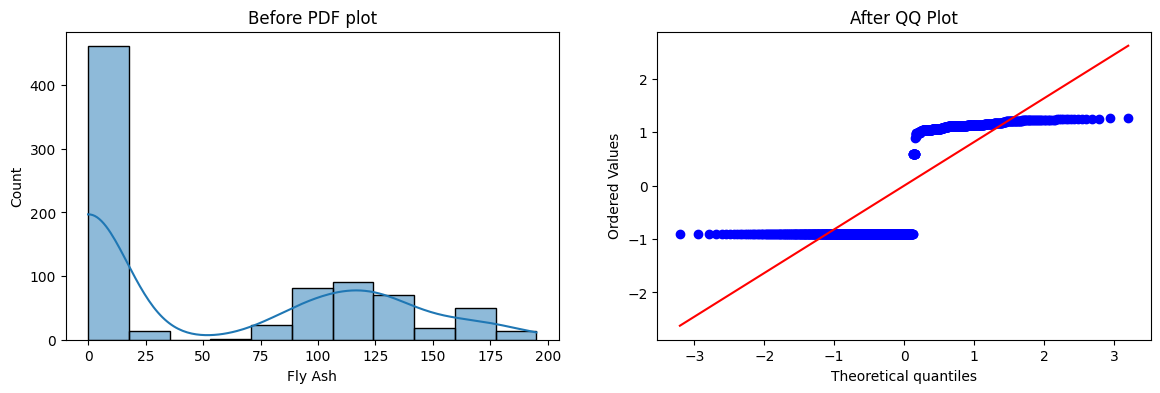

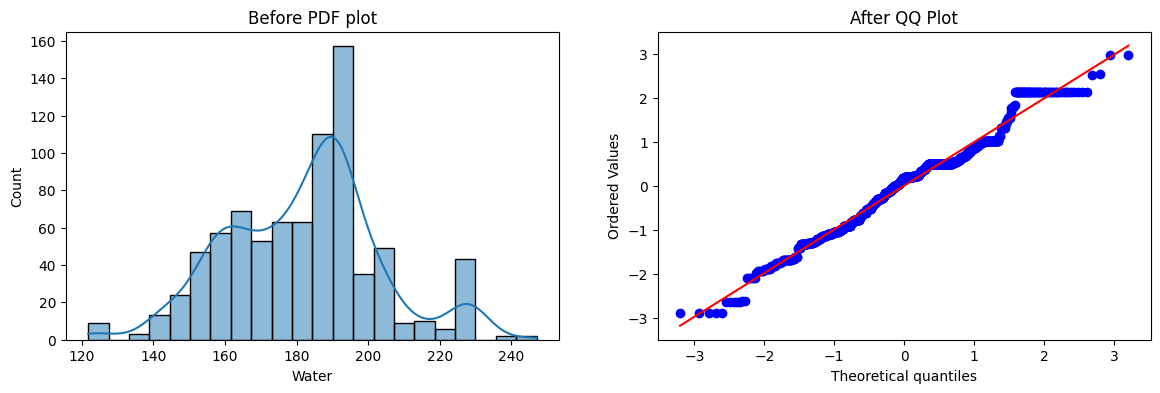

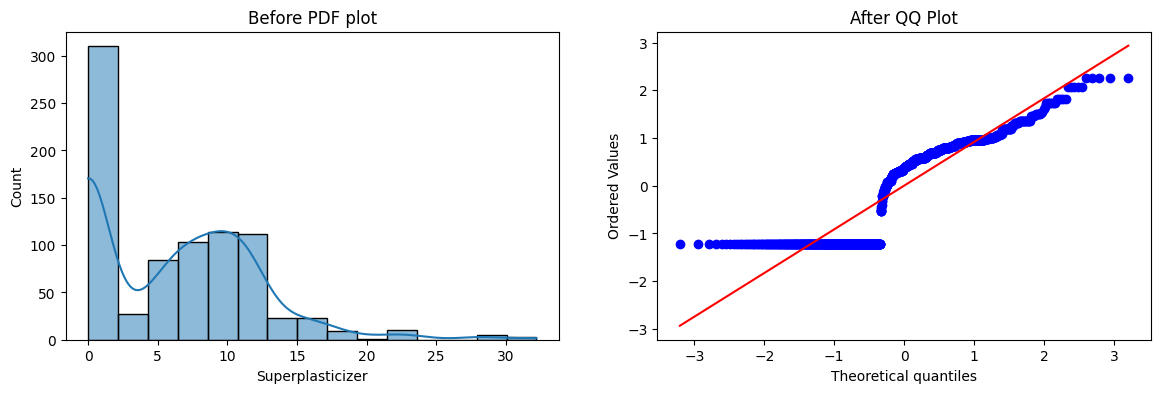

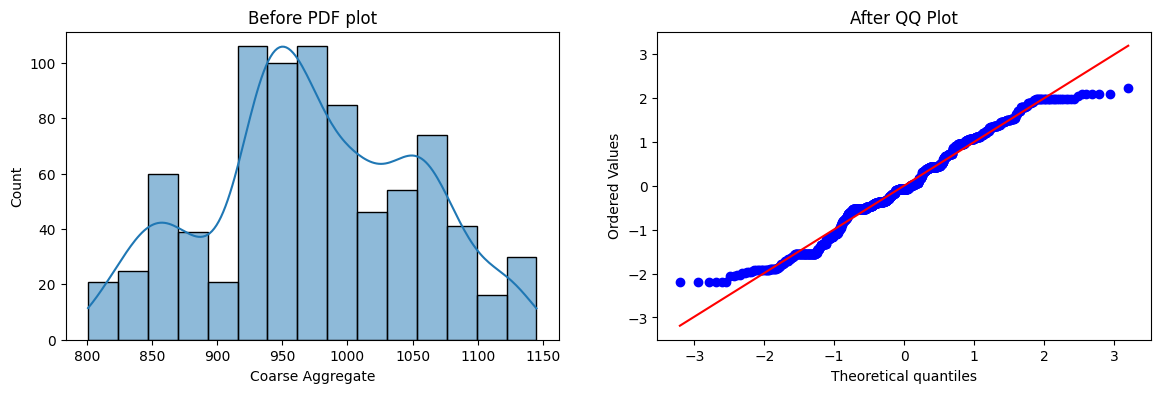

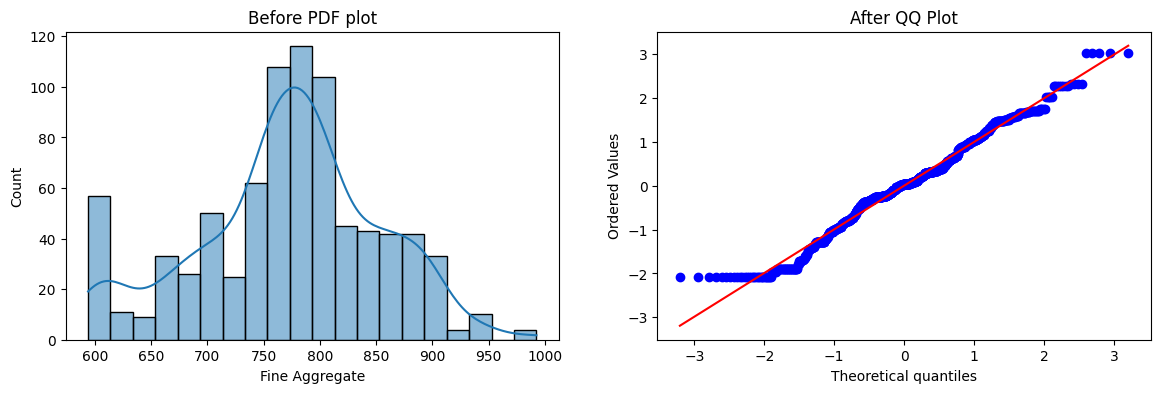

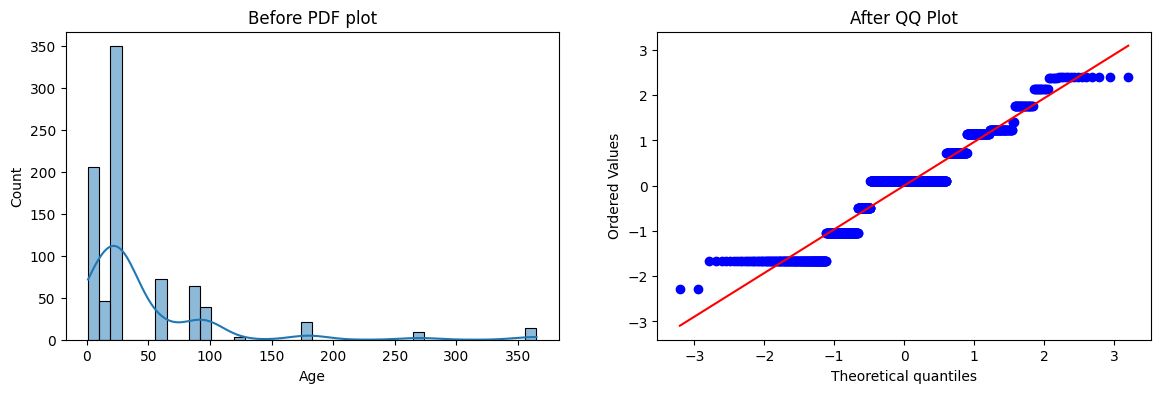

In [ ]:
for col in X_train.columns:
 plt.figure(figsize=(14,4))
 plt.subplot(121)
 sns.histplot(X_train[col], kde=True)
 plt.title("Before PDF plot", color = "black")

 plt.subplot(122)
 stats.probplot(X_train_transformed2[col], dist="norm", plot=plt)
 plt.title("After QQ Plot", color="black")

 plt.show()

# So at the end after completing all Transformation we conclude that Yo-Johnson is winner and best prediction after cross val score we get best results